# Averaging filter

In [29]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [30]:
img = cv2.imread('lenna.png')

In [31]:
imb3 = img[:,:,1]

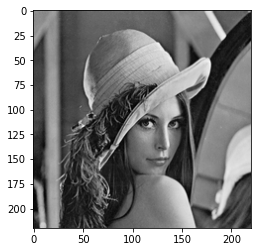

In [32]:
plt.imshow(imb3,cmap='gray')

In [33]:
m,n = imb3.shape

In [34]:
def convolution(img,mask,k):
    p = int((k-1)/2) 
    img_pad=np.pad(img, ((p,p),(p,p)), 'constant')
    m,n = img_pad.shape
    img_covule = np.zeros([m,n])

    for i in range(1, m-p):
        for j in range(1, n-p):
            temp = ((img_pad[i-1, j-1]*mask[0, 0])+(img_pad[i-1, j]*mask[0, 1])+(img_pad[i-1, j + 1]*mask[0, 2])+(img_pad[i, j-1]*mask[1, 0])+(img_pad[i, j]*mask[1, 1])+(img_pad[i, j + 1]*mask[1, 2])+(img_pad[i+1,j-1]*mask[2, 0])+(img_pad[i + 1, j]*mask[2, 1])+(img_pad[i + 1, j + 1]*mask[2, 2]))
            img_covule[i,j] = temp
    return img_covule[2:n-2,2:m-2]

In [35]:
mask = np.ones([5, 5], dtype = int)
mask = mask / 9

In [36]:
img_blur = convolution(imb3,mask,5)

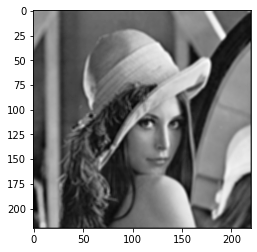

In [37]:
plt.imshow(img_blur,cmap='gray')

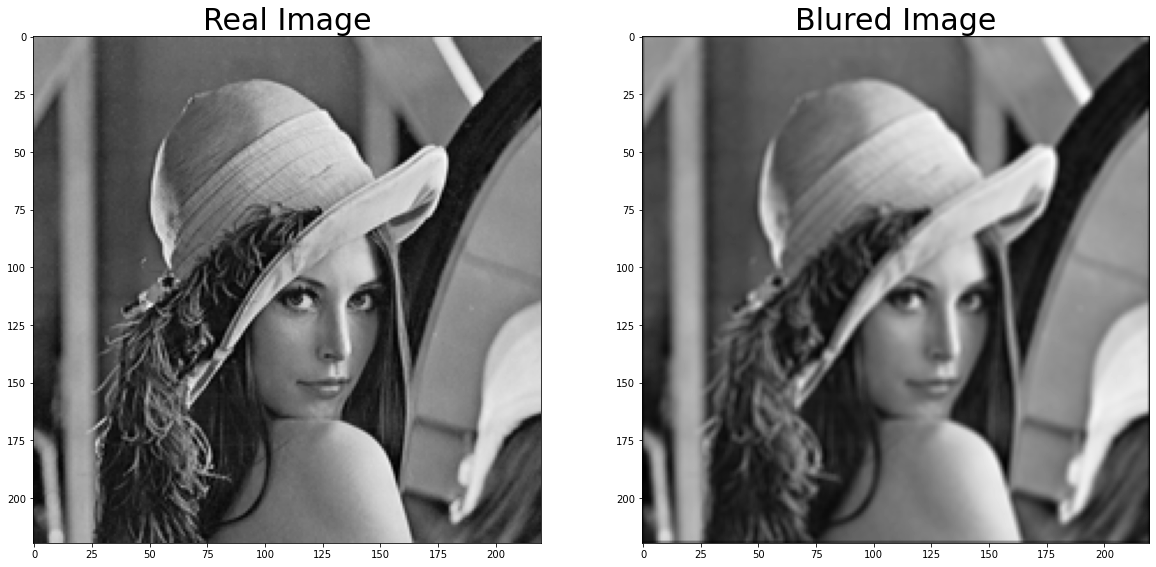

In [38]:
fig = plt.figure(figsize=(20,20))
a=fig.add_subplot(1,2,1)
plt.imshow(imb3,cmap='gray')
plt.title('Real Image',fontsize=30)
a=fig.add_subplot(1,2,2)
plt.title('Blured Image',fontsize=30)
plt.imshow(img_blur,cmap='gray')

# Goussian filter

In [39]:
def gussianfilter(s,sigma):
    maxX = s//2
    minX = -maxX
    minY = minX
    maxY = maxX

    G = np.zeros((s,s))

    for x in range(minX,maxX+1):
        for y in range(minY,maxY+1):
            v = (1/(2*np.pi*(sigma**2)))*np.exp(-(x**2+y**2)/(2*(sigma**2)))
            G[x-minX,y-minY] = v 
    return G        

In [40]:
gussian_mask = gussianfilter(5,1)
gussian_mask

array([[0.00291502, 0.01306423, 0.02153928, 0.01306423, 0.00291502],
       [0.01306423, 0.05854983, 0.09653235, 0.05854983, 0.01306423],
       [0.02153928, 0.09653235, 0.15915494, 0.09653235, 0.02153928],
       [0.01306423, 0.05854983, 0.09653235, 0.05854983, 0.01306423],
       [0.00291502, 0.01306423, 0.02153928, 0.01306423, 0.00291502]])

In [50]:

img_gussian_blur = convolution(imb3,gussian_mask,5)

In [51]:
cv_gussian = cv2.filter2D(imb3,-1,gussian_mask)

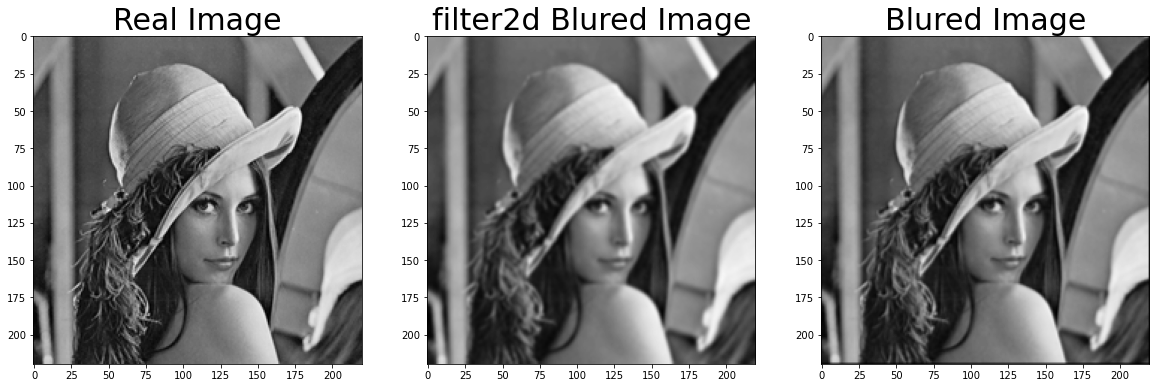

In [52]:
fig = plt.figure(figsize=(20,20))
a=fig.add_subplot(1,3,1)
plt.imshow(imb3,cmap='gray')
plt.title('Real Image',fontsize=30)
a=fig.add_subplot(1,3,2)
plt.title('filter2d Blured Image',fontsize=30)
plt.imshow(cv_gussian,cmap='gray')
a=fig.add_subplot(1,3,3)
plt.title('Blured Image',fontsize=30)
plt.imshow(img_gussian_blur,cmap='gray')

# Sharpning Laplacian filter

In [44]:
laplace_mask1 = np.array([[0,1,0],[1,-4,1],[0,1,0]])

In [45]:
laplace_mask2 = np.array([[1,1,1],[1,-8,1],[1,1,1]])

In [46]:
laplace_mask3 = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])

In [47]:
laplace_mask4 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

In [57]:
sharp_img1 = convolution(imb3,laplace_mask1,3)
sharp_img2 = convolution(imb3,laplace_mask2,3)
sharp_img3 = convolution(imb3,laplace_mask3,3)
sharp_img4 = convolution(imb3,laplace_mask4,3)

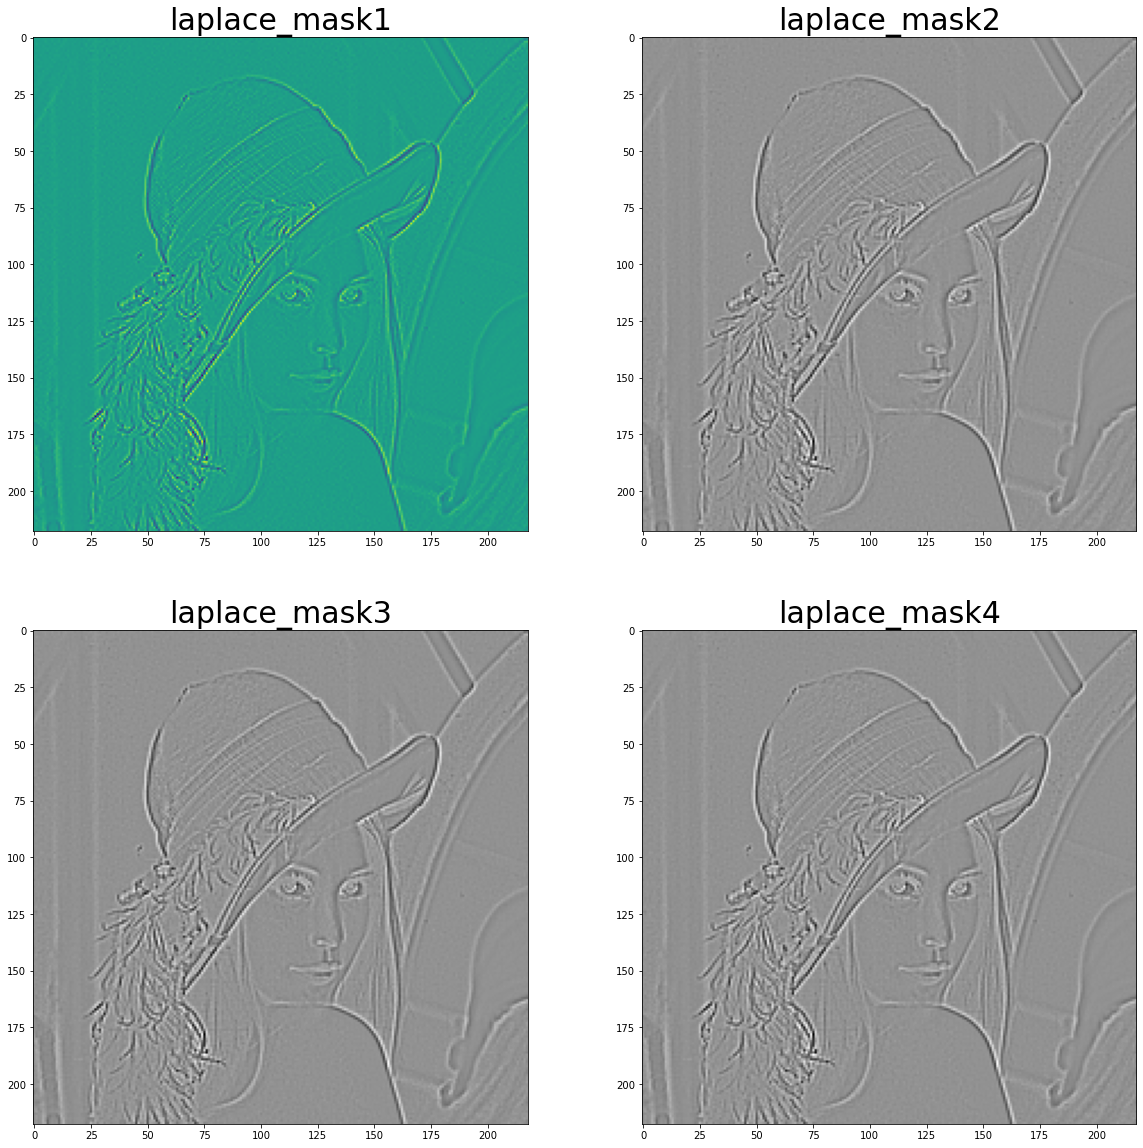

In [59]:
fig = plt.figure(figsize=(20,20))
a=fig.add_subplot(2,2,1)
plt.imshow(sharp_img1,cmap='gray')
plt.title('laplace_mask1',fontsize=30)
a=fig.add_subplot(2,2,2)
plt.title('laplace_mask2',fontsize=30)
plt.imshow(sharp_img2,cmap='gray')
a=fig.add_subplot(2,2,3)
plt.title('laplace_mask3',fontsize=30)
plt.imshow(sharp_img2,cmap='gray')
a=fig.add_subplot(2,2,4)
plt.title('laplace_mask4',fontsize=30)
plt.imshow(sharp_img2,cmap='gray')